---

## **넷째마당. 다양한 데이터 분석의 세계**
---
---


## **Ch10 텍스트 마이닝**
#### **형태소 분석(morphology analysis)**
##### > 문장을 구성하는 어절들의 품사를 분석
##### > 텍스트 마이닝할 때 가장 먼저 하는 작업
##### > 명사, 동사, 형용사 등 의미를 지닌 품사를 추출해 빈도 확인

### **10-1 대통령 연설문 텍스트 마이닝**

##### **`KoNLPy` 패키지 설치하기**
###### KoNLPy (Korean Natural Language Processing in Python)
##### 1. 자바 설치하기
###### > 윈도우 설정 → 시스템 → 정보 → ‘장치 사양’의 ’시스템 종류’ 에서 운영 체제 버전 확인
###### > http://abit.ly/easypy_101 에서 운영 체제 버전에 맞는 설치 파일 다운로드, 설치하기
###### >> amazon-corretto-11.0.21.9.1-windows-x64.msi JDK 파일

##### 2. jpype1 패키지 설치하기
###### > jpype1은 `KoNLPy` 의존성 패키지 
###### >> jpype1은 Python 프로그램과 Java 프로그램 간에 상호 운용성을 제공하는 라이브러리
###### >> pip install jpype1
##### 3. `KoNLPy` 설치하기
###### >> pip install konlpy

In [1]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '300'})
%config InlineBackend.figure_format = 'retina'

#### **가장 많이 사용된 단어 알아보기**

##### **1. 연설문 불러오기**

In [2]:
## 문재인 대선 출마 선언문 읽어오기
moon = open('speech_moon.txt', encoding = 'UTF-8').read()
print(type(moon))
moon[:1000]

<class 'str'>


'정권교체 하겠습니다!\n  정치교체 하겠습니다!\n  시대교체 하겠습니다!\n  \n  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.\n\n그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치로 불러냈습니다. 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다. 이제 저는 국민과 함께 높이 날고 크게 울겠습니다. 오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.\n\n\n‘우리나라 대통령’이 되겠습니다.\n\n\n존경하는 국민 여러분!\n  \n  저는 대통령이 되겠습니다. 우리나라 대통령이 되겠습니다. 소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.\n\n지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다. 나라의 주인으로 행세하지 못했고, 주인으로 대접받지 못했습니다. 나서서 말도 하지 못했습니다. 이제 몸을 일으켜 날아야 합니다. 당당하게 말하고 정치에 참여해야 합니다.\n\n제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다. 저는 시민과 동행하는 정치를 하고 싶습니다. 제가 추구하는 ‘우리나라’는 특권과 불평등의 나라가 아니라, 보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다.\n\n이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다. 힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제, 낡은 정치, 낡은 권력도 모두 끝났습니다. 오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다.\n\n국민이 모두 아픕니다.\n\n제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고, 우리가 처한 현실이 너무도 엄중

##### **2. 불필요한 문자 제거하기**
###### > re 라이브러리는 Python 표준 라이브러리로 "정규 표현식" (Regular Expression) 모듈
###### > 정규 표현식은 텍스트 패턴을 검색, 추출 및 변환하는 데 사용

In [75]:
## 불필요한 문자 제거하기
# 한글을 제외한 문자를 제거: [문자열 변수에 적용]
import re  # 문자처리 패키지 re

moon = re.sub('[^가-힣]', ' ', moon)  #'가'~'힣'까지 문자가 아닌 것은 ' ' 대체(substitution)
moon[:1000]

'정권교체 하겠습니다    정치교체 하겠습니다    시대교체 하겠습니다        불비불명       이라는 고사가 있습니다  남쪽 언덕 나뭇가지에 앉아   년 동안 날지도 울지도 않는 새  그러나 그 새는 한번 날면 하늘 끝까지 날고  한번 울면 천지를 뒤흔듭니다   그 동안 정치와 거리를 둬 왔습니다  그러나 암울한 시대가 저를 정치로 불러냈습니다  더 이상 남쪽 나뭇가지에 머무를 수 없었습니다  이제 저는 국민과 함께 높이 날고 크게 울겠습니다  오늘 저는 제  대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다     우리나라 대통령 이 되겠습니다    존경하는 국민 여러분       저는 대통령이 되겠습니다  우리나라 대통령이 되겠습니다  소수 특권층의 나라가 아니라 보통사람들이 주인인  우리나라   네 편 내 편 편가르지 않고 함께 가는 우리나라   우리 라는 말이 조금도 부끄럽지 않은  진정한  우리나라 의 대통령이 되겠습니다   지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다  나라의 주인으로 행세하지 못했고  주인으로 대접받지 못했습니다  나서서 말도 하지 못했습니다  이제 몸을 일으켜 날아야 합니다  당당하게 말하고 정치에 참여해야 합니다   제가 추구하는  우리나라 는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다  저는 시민과 동행하는 정치를 하고 싶습니다  제가 추구하는  우리나라 는 특권과 불평등의 나라가 아니라  보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다   이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다  힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제  낡은 정치  낡은 권력도 모두 끝났습니다  오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다   국민이 모두 아픕니다   제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고  우리가 처한 현실이 너무도 엄중하기 때문입니다  근본적인 혁신  거대한 전

##### **3. 명사 추출하기**
###### 형태소분석기 Hannanum를 사용하기 위한 인스턴스 객체를 생성한 후에 추출 작업

In [5]:
## 형태소분석 준비: hannanum 인스턴스 객체 만들기
import konlpy

hannanum = konlpy.tag.Hannanum()  #형태소분석기 Hannanum를 사용하기 위한 인스턴스 객체를 생성

In [6]:
## 형태소분석: 명사 추출하기
hannanum.nouns("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '영토', '한반도', '부속도서']

In [8]:
## [연습] 연설문에서 명사 추출하기
nouns = hannanum.nouns(moon)  #추출 결과는 복수개 항목이므로 리스트 자료형
print(type(nouns))
print(len(nouns))
nouns[:10]

<class 'list'>
1413


['정권교체', '정치교체', '시대교체', '불비불명', '고사', '남쪽', '언덕', '나뭇가지', '년', '동안']

In [9]:
## 추출된 명사들을 데이터 프레임으로 변환
import pandas as pd

df_word = pd.DataFrame({'word' : nouns})
df_word

,word
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사
...,...
1408,모두
1409,주인
1410,진정한
1411,우리나라


##### **4. 단어 빈도표 만들기**

In [15]:
## 글자 수 파생변수 'len' 추가
df_word['len'] = df_word['word'].str.len()
df_word

,word,len
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [16]:
## 데이터 프레임 재구성: 두 글자 이상 단어만 남기기
df_word = df_word.query('len >= 2')
df_word

,word,len
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [27]:
## 단어 빈도 수 데이터 프레임 생성: 단어 빈도 순으로 정렬
df_cnt = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending = False)
df_cnt

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
278,북핵문제,1
279,분단,1
281,분야,1
283,분쟁,1


##### **5. 단어 빈도 막대 그래프 만들기**

In [18]:
## 단어 빈도 상위 20개 데이터 프레임 생성 
top20 = df_cnt.head(20)
top20

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
202,대한민국,11
693,확대,11
525,정치,10
423,우리나라,10
304,사회,9


In [19]:
## 폰트, 화면 설정
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family'    : 'Malgun Gothic',  # 한글 폰트 설정
                     'figure.dpi'     : '120',            # 해상도 설정
                     'figure.figsize' : [6.5, 6]})        # 가로 세로 크기(inch) 설정

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_catego

<Axes: xlabel='n', ylabel='word'>

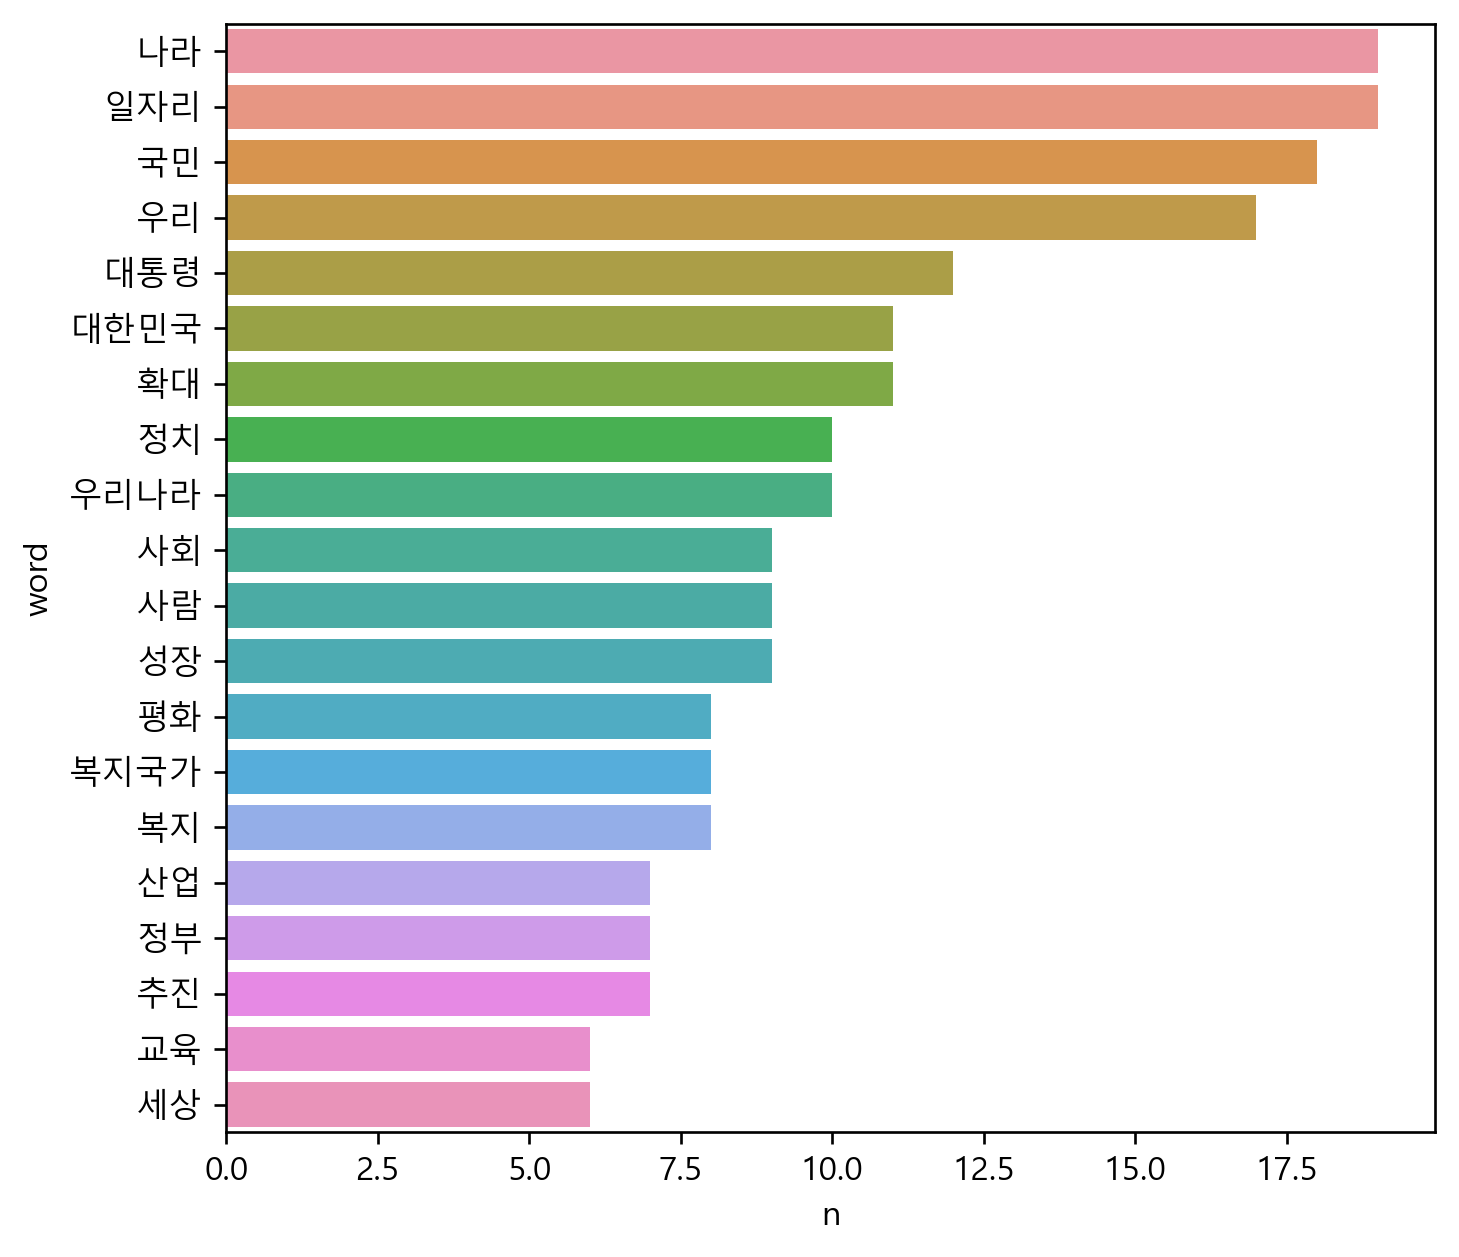

In [20]:
## 막대 그래프 그리기: 단어 빈도 상위 20개를 
import seaborn as sns

sns.barplot(data = top20, y = 'word', x = 'n')

### **워드 클라우드 만들기**

##### **1. `wordcloud` 패키지 설치하기**

##### **2. 한글 폰트 설정하기**

##### > Working directory에 DoHyeon-Regular.ttf 파일을 위치시킴

In [21]:
## 분석 준비: 배달의민족 도현체 폰트 사용
font = 'DoHyeon-Regular.ttf'  #배달의민족 도현체 폰트 파일

##### **3. 단어와 빈도를 담은 딕셔너리 만들기**
###### 원드 클라우드는 단어의 빈도 수를 갖는 딕셔너리로부터 구성함

###### **데이터 프레임으로부터 딕셔너리 만들기**
###### > 딕셔너리의 키로 사용하기 위해 데이터 프레임의 대표 컬럼을 index로 전환 필요

In [42]:
## 분석 준비: df_cnt의 word 컬럼을 index로 전환
df_cnt_new = df_cnt.set_index('word')  #word 컬럼을 index로 전환
df_cnt_new

,n
word,
나라,19
일자리,19
국민,18
우리,17
대통령,12
...,...
북핵문제,1
분단,1
분야,1


In [43]:
## 데이터 프레임의 두 컬럼으로부터 딕셔너리 구성 
dic_word = df_cnt_new.to_dict()['n']
dic_word.items()

dict_items([('나라', 19), ('일자리', 19), ('국민', 18), ('우리', 17), ('대통령', 12), ('대한민국', 11), ('확대', 11), ('정치', 10), ('우리나라', 10), ('사회', 9), ('사람', 9), ('성장', 9), ('평화', 8), ('복지국가', 8), ('복지', 8), ('산업', 7), ('정부', 7), ('추진', 7), ('교육', 6), ('세상', 6), ('경쟁', 6), ('보통사람들', 5), ('공평', 5), ('경제', 5), ('대통령의', 5), ('상생', 5), ('정규직', 5), ('정의', 4), ('결과', 4), ('사회적', 4), ('투자', 4), ('주인', 4), ('전환', 4), ('때문', 4), ('모델', 4), ('요구', 4), ('희망', 4), ('창출', 4), ('역사', 4), ('기회', 4), ('여성', 4), ('담쟁', 4), ('강화', 4), ('아래', 4), ('고통', 4), ('약자', 4), ('아이들', 4), ('중소기업', 4), ('공정', 3), ('문재인', 3), ('특권', 3), ('국가', 3), ('사람들', 3), ('노인', 3), ('변화', 3), ('비중', 3), ('교육혁신', 3), ('관계', 3), ('질서', 3), ('군대', 3), ('지원', 3), ('과도한', 3), ('권력', 3), ('부담', 3), ('그것', 3), ('지방', 3), ('국민들', 3), ('채택', 3), ('소수', 3), ('세계', 3), ('신산업', 3), ('시민', 3), ('개선', 3), ('혁신', 3), ('혁명', 3), ('양극화', 3), ('원칙', 3), ('활용', 3), ('행복', 3), ('원전', 3), ('에너지', 3), ('경제성장', 3), ('세금', 3), ('이명박', 3), ('성장전략', 3), ('가치', 3), (

#### **[실습-1] 구성된 딕셔너리의 item을 10개만 출력**
###### > 딕셔너리의 데이터 항목(item)은 키(key)와 그에 대응되는 값(value)으로 구성됨

In [45]:
## [확인] 딕셔너리에서 item 10개만 출력: item들을 리스트로 읽어내어 10개만 선택
dic_list = list(dic_word.items())
dic_list[:10]

[('나라', 19),
 ('일자리', 19),
 ('국민', 18),
 ('우리', 17),
 ('대통령', 12),
 ('대한민국', 11),
 ('확대', 11),
 ('정치', 10),
 ('우리나라', 10),
 ('사회', 9)]

In [46]:
## [확인] 딕셔너리에서 item 10개만 출력: for 반복문으로 item을  10개만 선택
cnt = 0
for word, n in dic_word.items():
    cnt += 1
    print(word, cnt)
    if cnt >= 10:
        break

나라 1
일자리 2
국민 3
우리 4
대통령 5
대한민국 6
확대 7
정치 8
우리나라 9
사회 10


##### **4. 워드 클라우드 만들기**

In [37]:
## 배달의민족 도현체 폰트 사용
font = 'DoHyeon-Regular.ttf'  #배달의민족 도현체 폰트 파일

In [39]:
## WordCloud 객체 wc 만들기
from wordcloud import WordCloud

wc = WordCloud(random_state = 1234,         # 난수의 씨드를 1234로 고정(난수 발생 중지)
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기(Pixels)
               height = 400,                # 세로 크기(Pixels)
               background_color = 'white')  # 배경색

In [47]:
## 워드 클라우드 객체 만들기 
img_wordcloud = wc.generate_from_frequencies(dic_word)

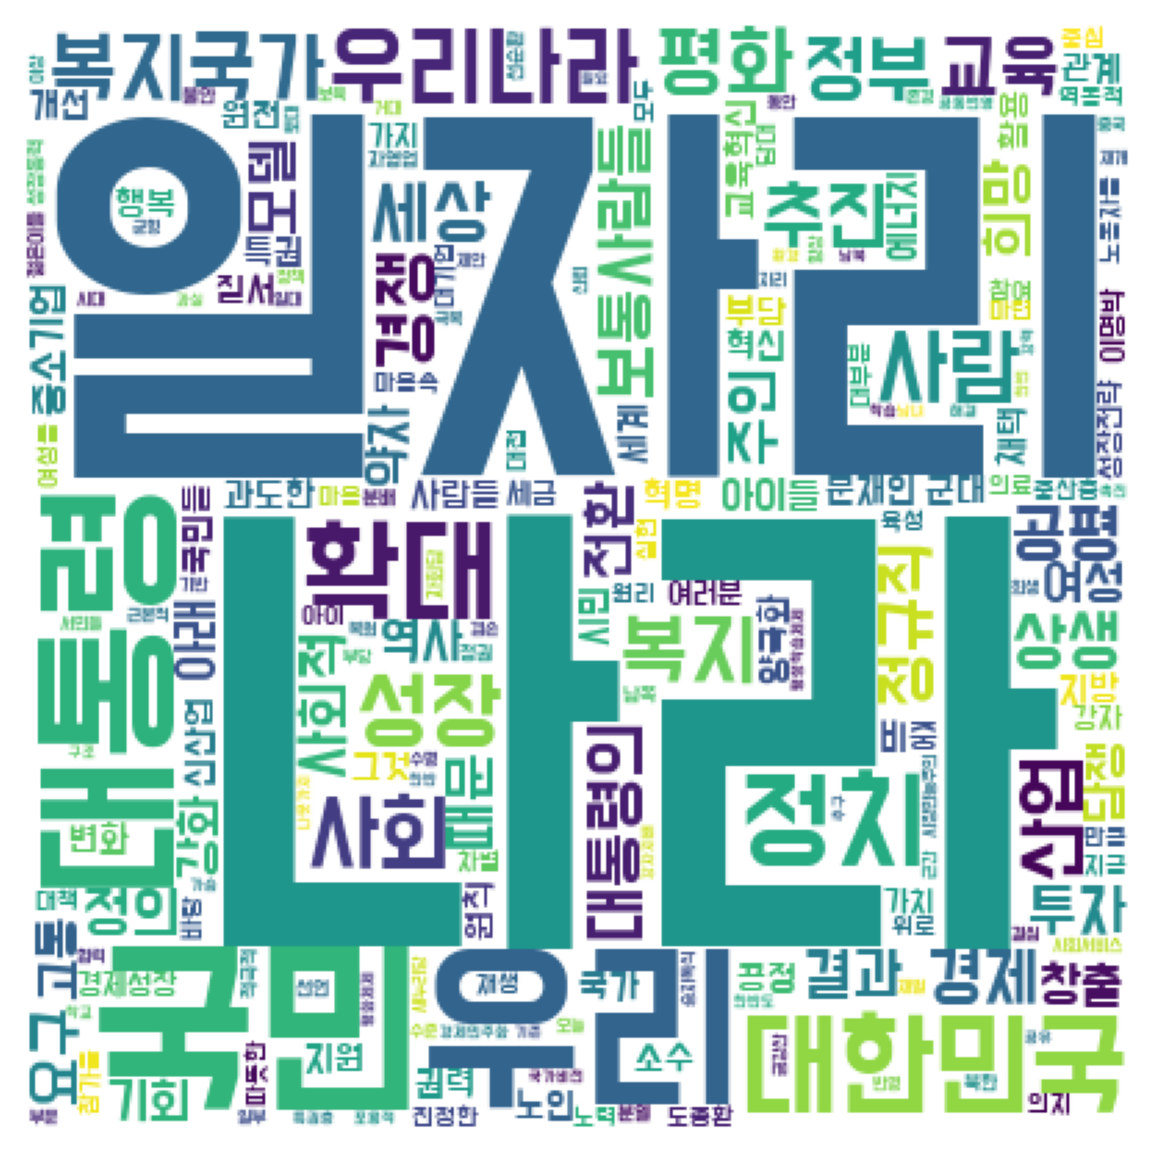

In [48]:
## 워드 클라우드 이미지 출력하기
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))    # 가로, 세로 크기 설정(inch)
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud)       # 워드 클라우드 출력

### **워드 클라우드 모양 바꾸기**
###### WordCloud 객체에 마스킹(masking)할 이미지를 지정
###### > 마스킹 이미지는 투명/불투명이 있는 이미지 사용

##### **1. mask 만들기**
###### import PIL  #Python Imaging Library 이용

In [49]:
## masking에 사용할 이미지 지정
import PIL  #Python Imaging Library

icon = PIL.Image.open('cloud.png')

###### PIL.Image.new(mode, size, 배경색 color)

In [52]:
## 이미지로 Mask 만들기: PIL.Image.new(mode, size, 배경색 color)
import numpy as np

img = PIL.Image.new('RGB', icon.size, (255, 255, 255))  #PIL 객체 만들기
img.paste(icon, icon)  #PIL 객체에 이미지 연결
img = np.array(img)    #PIL 객체에 이미지 정보 생성 

##### **2. 워드 클라우드 만들기**
###### WordCloud()에 마스킹 이미지 정보를 담고있는 PIL 객체 지정

In [53]:
## WordCloud 객체 wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)                  # mask 설정

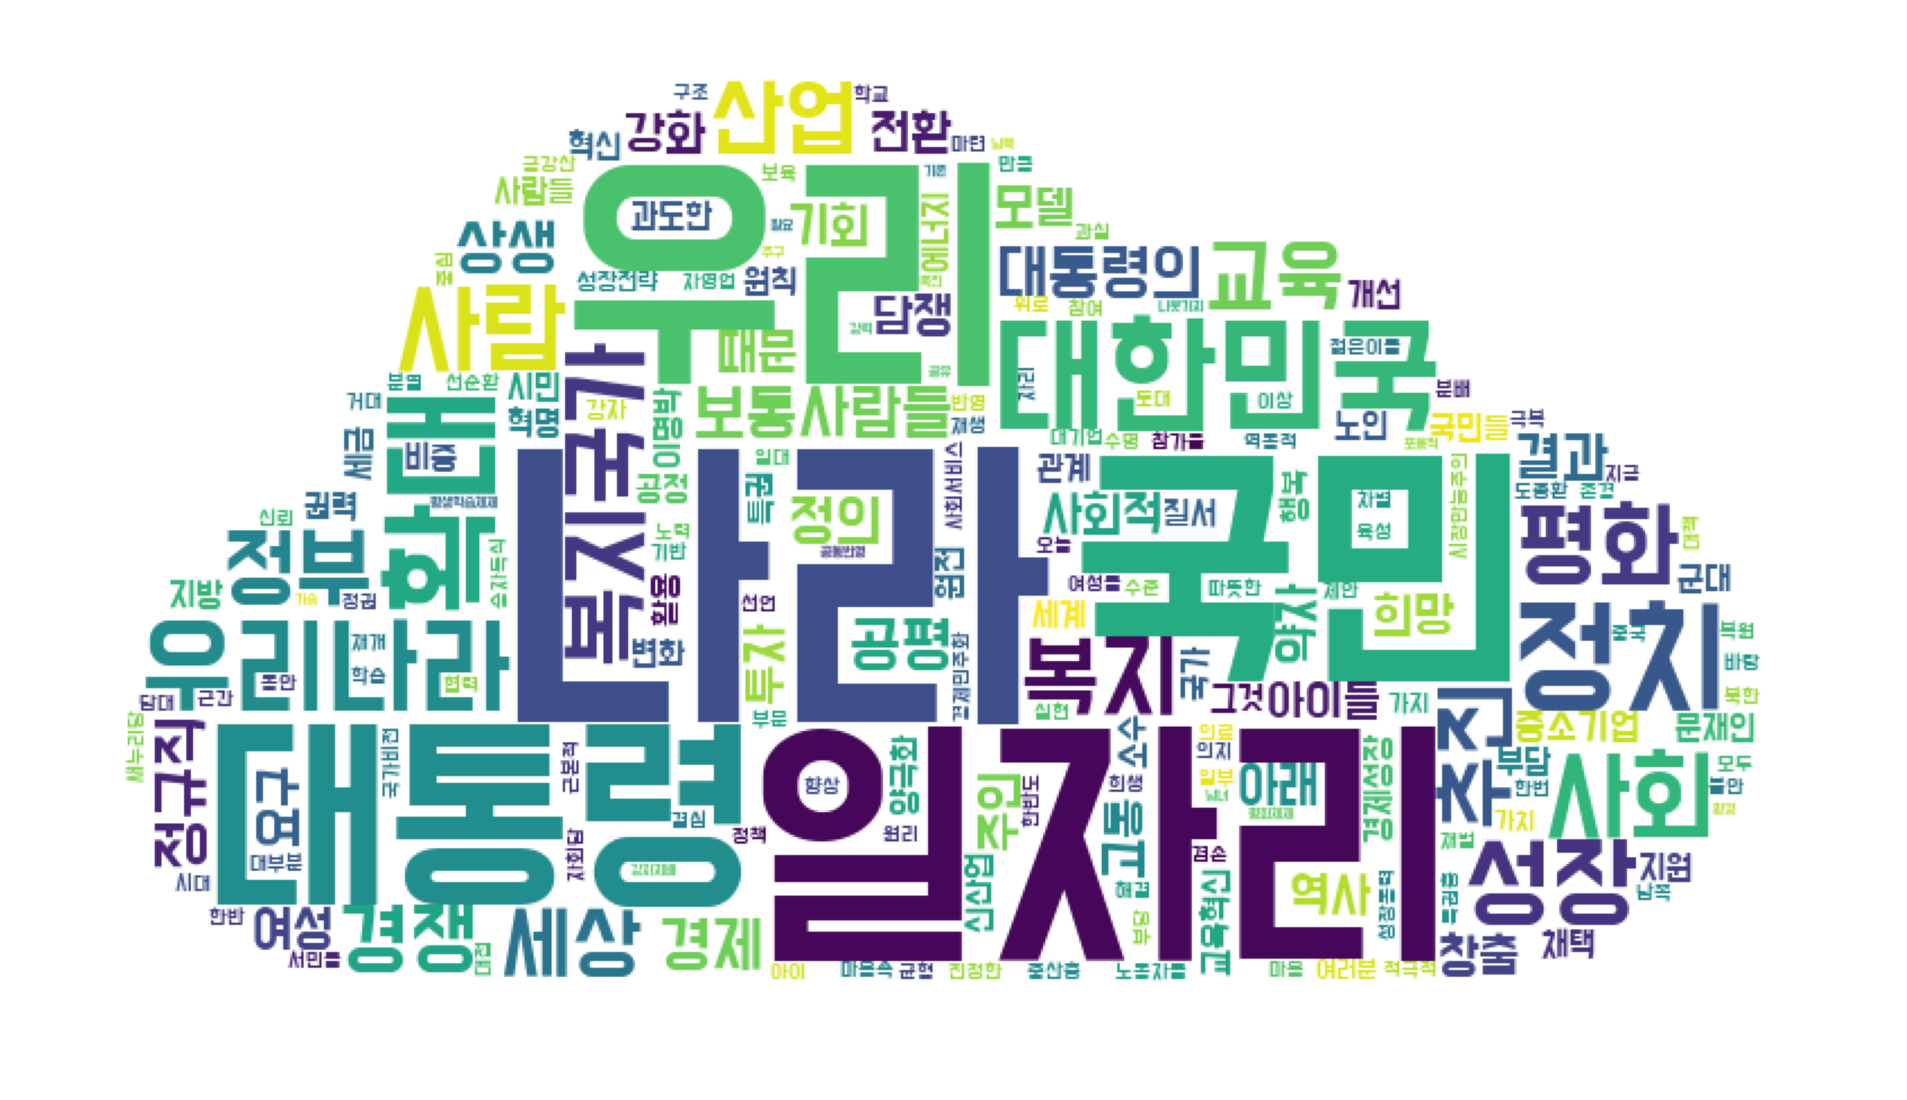

In [54]:
## 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud)       # 워드 클라우드 출력

### **워드 클라우드 색깔 바꾸기**
##### WordCloud(colormap = 'map')로 적용
###### > 'cividis': 갈색-파란색 색상 맵 (default)
###### > 'inferno': 빨간색-노란색 색상 맵
###### > 'viridis': 파란색-녹색-노란색 색상 맵
###### > 'coolwarm': 데이터의 양극단을 강조하는 냉-따뜻한 색상 맵
###### > 'jet': 많은 예제에서 사용되지만, 색盲 환경에는 적합하지 않아 권장되지 않음.

In [55]:
## WordCloud 객체 wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img,                  # mask 설정
               colormap = 'inferno')        # 컬러맵 설정

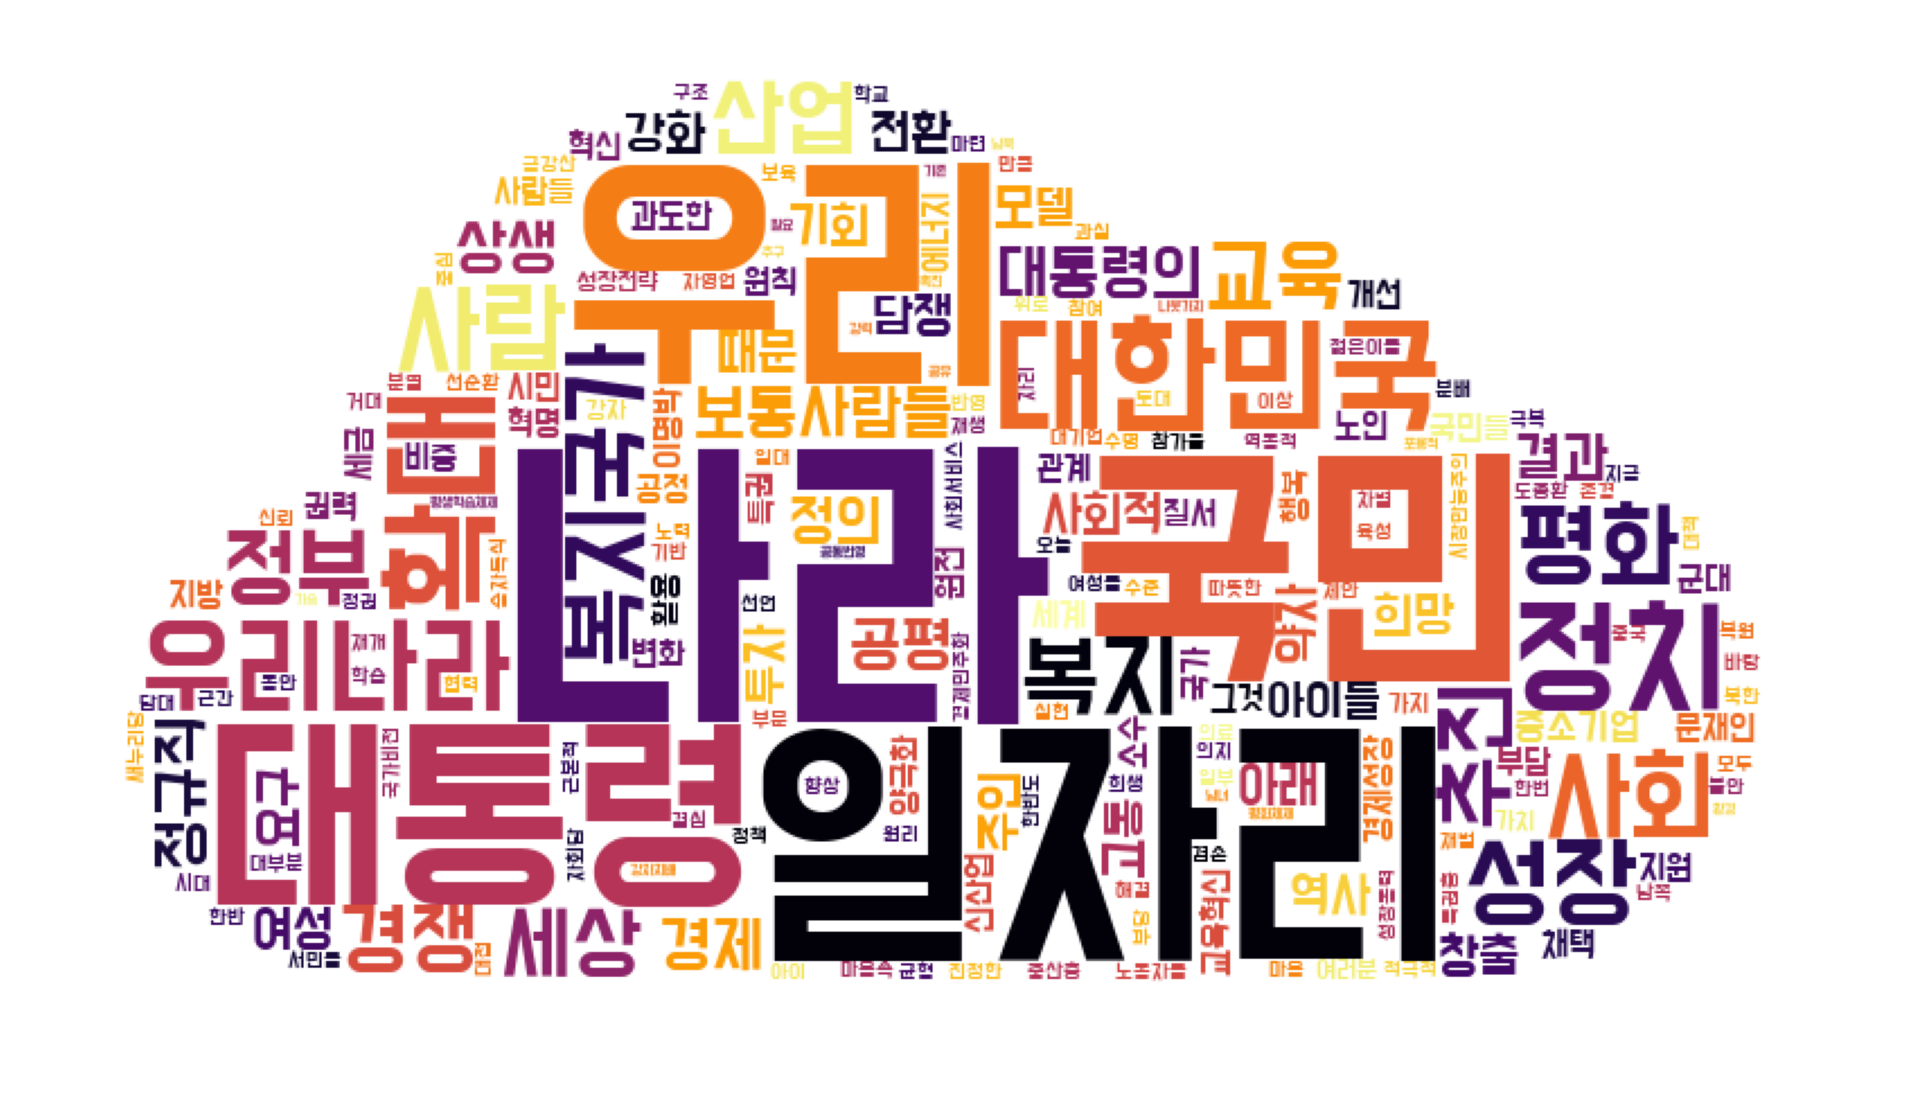

In [56]:
## 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud)       # 워드 클라우드 출력

#### **[실습-2] 내가 만든 Mask 이미지로 워드 클라우드 만들기**
##### **Mask  이미지 쉽게 만드는 방법** : 파워포인트 도형 사용
###### > 파워포인트에서 도형 선택
###### > 도형을 검은색으로 변경
###### > 도형을 선택하여 '다른 이미지로 저장' 선택 > *.png 파일로 저장
###### > *.png 파일을 그림판 앱으로 열어서
###### >> 이미지를 모두 선택해서, 선택 메뉴에서 '선택 영역 투명하게'를 선택
###### >*.png 파일 저장

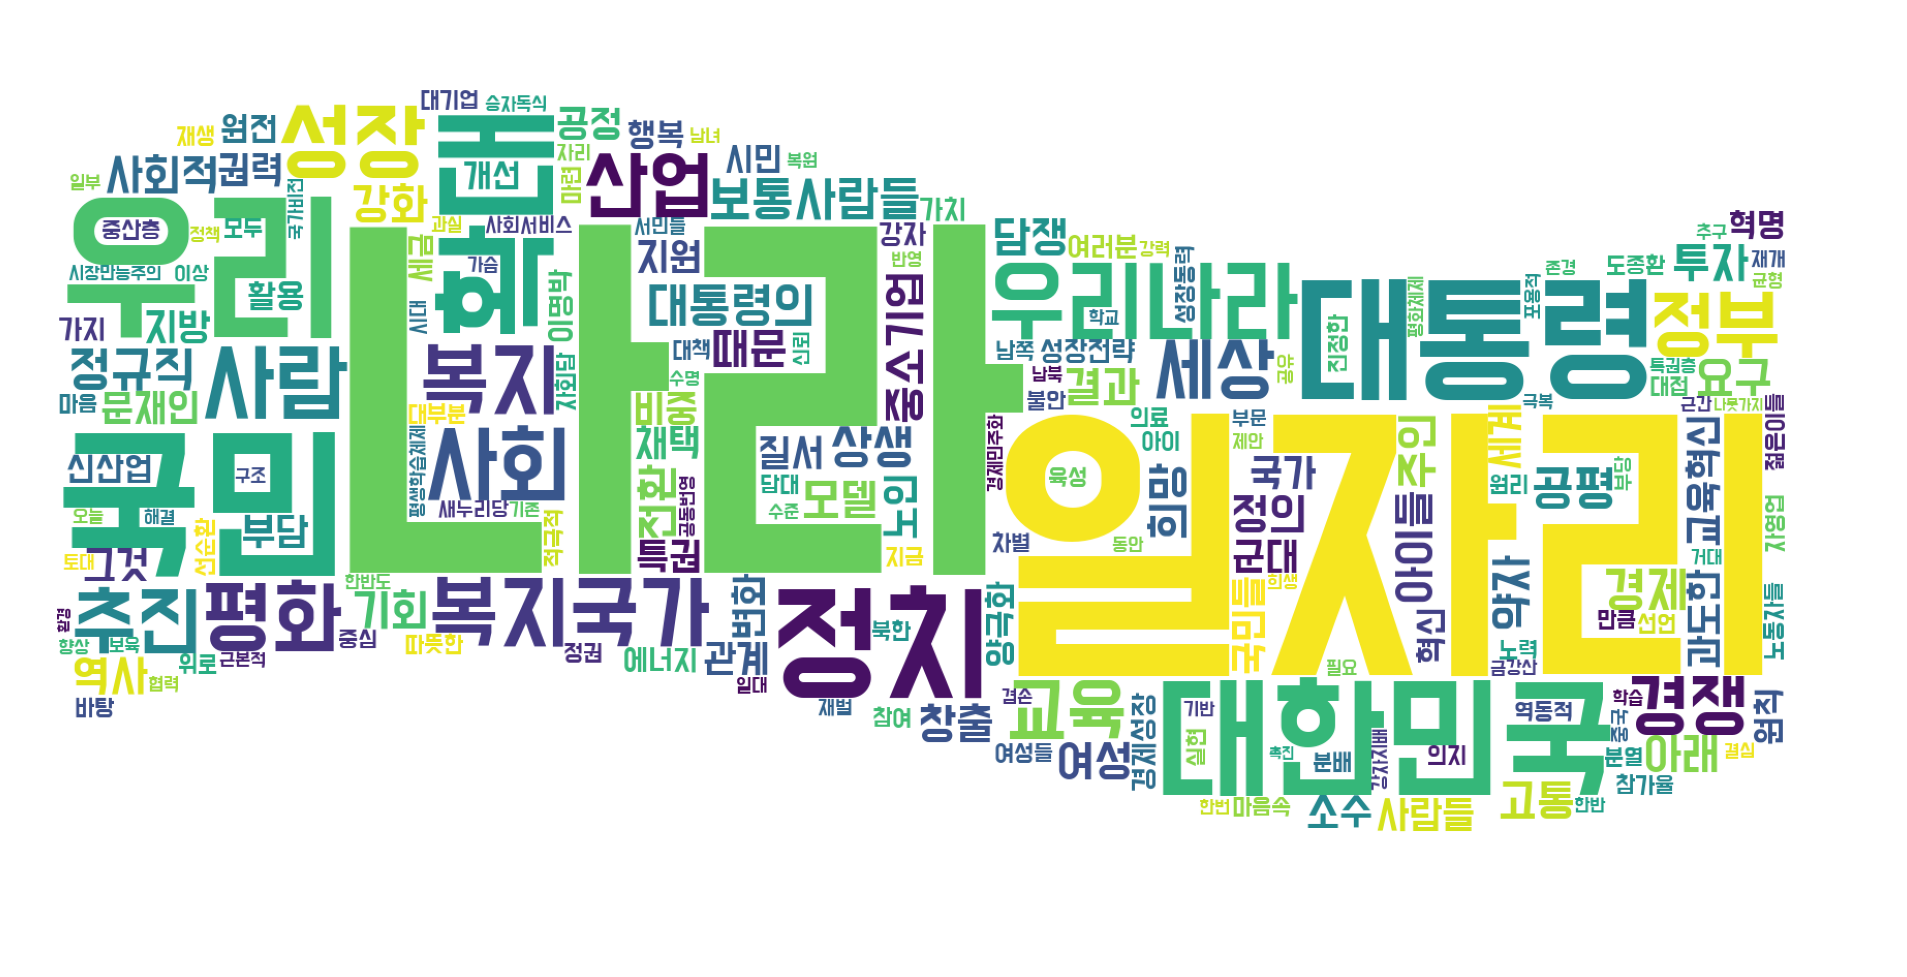

In [62]:
## masking에 사용할 이미지 지정
import PIL  #Python Imaging Library
import numpy as np

icon = PIL.Image.open('ribbon.png')

## 이미지로 Mask 만들기
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

## WordCloud 객체 wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)  

## 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud)       # 워드 클라우드 출력

### **10-2 기사 댓글 텍스트 마이닝**

#### **가장 많이 사용된 단어 알아보기**

##### **1. 기사 댓글 불러오기**

In [102]:
## BTS 관련 기사 댓글 데이터 불러오기
import pandas as pd

df = pd.read_csv('news_comment_BTS.csv', encoding = 'UTF-8')
df.head()

,reg_time,reply,press,title,url
0,2020-09-01 22:58:09,국보소년단<U+0001F49C>,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
1,2020-09-01 09:56:46,아줌마가 들어도 좋더라,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
2,2020-09-01 09:08:06,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
3,2020-09-01 08:52:32,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
4,2020-09-01 08:36:33,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요",한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...


In [64]:
## 데이터 프레임 정보 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


##### **2. 불필요한 문자 제거하기**

In [103]:
## 불필요한 문자 제거하기 : 한글만 살리기 [데이터 프레임의 변수에 적용]
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex = True) #정규표현식('[^가-힣]') 적용
df['reply'].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

##### **3. 명사 추출하기**
###### > Kkma(꼬꼬마) 형태소 분석기 사용
###### >> 띄어쓰기 오류가 있는 문장에서도 형태소를 잘 추출하는 분석기

In [104]:
## 형태소 분석기 객체 생성: kkma 만들기
import konlpy

kkma = konlpy.tag.Kkma()  #형태소 분석기 객체 생성

In [96]:
## [연습] 형태소 분석: kkma.nouns 메서드 적용(apply())
string = "나는 자랑스러운 태극기 앞에 자유롭고 정의로운 대한민국의 무궁한 영광을 위하여 충성을 다할 것을 굳게 다짐합니다."

nouns = kkma.nouns(string)
nouns

['나', '자랑', '태극기', '앞', '자유', '정의', '대한', '대한민국', '민국', '무궁', '영광', '충성', '다짐']

In [105]:
## 명사 추출 : 'reply' 열 변수에 kkma.nouns 메서드 적용(apply())
# 분석하는데 시간이 좀 소요됨
nouns = df['reply'].apply(kkma.nouns) #apply()로 한 건씩 추출(데이터 프레임의 변수에 적용하므로)
nouns

0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2                   [팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]
3              [방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 탄, 자랑, 사랑]
1197                                              [애, 군대]
1198                                     [군, 군면제급, 면제, 급]
1199    [자랑, 축하, 김, 김남, 남, 김석진, 민, 민윤기, 윤기, 정, 정호석, 호석...
Name: reply, Length: 1200, dtype: object

In [169]:
type(nouns)

pandas.core.series.Series

##### **4. 단어 빈도표 만들기**
##### 한 행에 여러 단어가 포함되어 있는 것을 한행당 한 단어로 행 분리
##### > **explode()** 함수 사용
###### >> explode() 함수는 Pandas에서 Series나 DataFrame 내에 있는 리스트나 배열과 같은 값의 요소를 풀어서(분해하여) 새로운 행(row)을 생성

In [91]:
##[연습] Series에서 다중 값들을 분해
import pandas as pd

data = {'A': [1, 2, 3], 'B': [[4, 5, 6], [7, 8], [9]]}
df = pd.DataFrame(data)
df

,A,B
0,1,"[4, 5, 6]"
1,2,"[7, 8]"
2,3,[9]


In [94]:
##[연습] Series에서 다중 값들을 분해: 'B' 컬럼 값을 분해해서 'A'컬럼에 연결
df.explode('B')

,A,B
0,1,4
0,1,5
0,1,6
1,2,7
1,2,8
2,3,9


In [95]:
##[연습] Series에서 다중 값들을 분해: 'B' 컬럼 값을 분해
df['B'].explode('B')

0    4
1    5
2    6
3    7
4    8
5    9
Name: B, dtype: object

In [106]:
## 한 행에 한 단어가 들어가도록 nons를 재구성
nouns = nouns.explode()  #Series에서 다중 값들을 분해
nouns

0          국보
0       국보소년단
0         소년단
1         아줌마
2          팩트
        ...  
1199      박지민
1199      김태형
1199        전
1199      전정국
1199       정국
Name: reply, Length: 9353, dtype: object

In [107]:
## 데이터 프레임 만들기: 'word' 컬럼이 nouns 단어를 값으로 하는
df_word = pd.DataFrame({'word' : nouns})
df_word

,word
0,국보
0,국보소년단
0,소년단
1,아줌마
2,팩트
...,...
1199,박지민
1199,김태형
1199,전
1199,전정국


In [108]:
## 데이터 프레임에 'count' 컬럼 추가
# 글자 빈도 수 컬럼 추가, 두 글자 이상 단어만 남기기
df_word['count'] = df_word['word'].str.len()

# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0
...,...,...
1199,박지,2.0
1199,박지민,3.0
1199,김태형,3.0
1199,전정국,3.0


In [109]:
## 단어별 빈도 수 데이터 프레임 만들기
# 단어별 분리, # 빈도 구하기, # 내림차순 정렬
df_cnt = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending = False)
df_cnt

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
1136,실력있음,1
406,다음주면,1
1134,신화,1
1133,신중,1


##### **5. 단어 빈도 막대 그래프 만들기**
##### 단어 빈도 상위 20개를 추출하여 그리기

In [110]:
## 단어 빈도 상위 20개 추출
top20 = df_cnt.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='n', ylabel='word'>

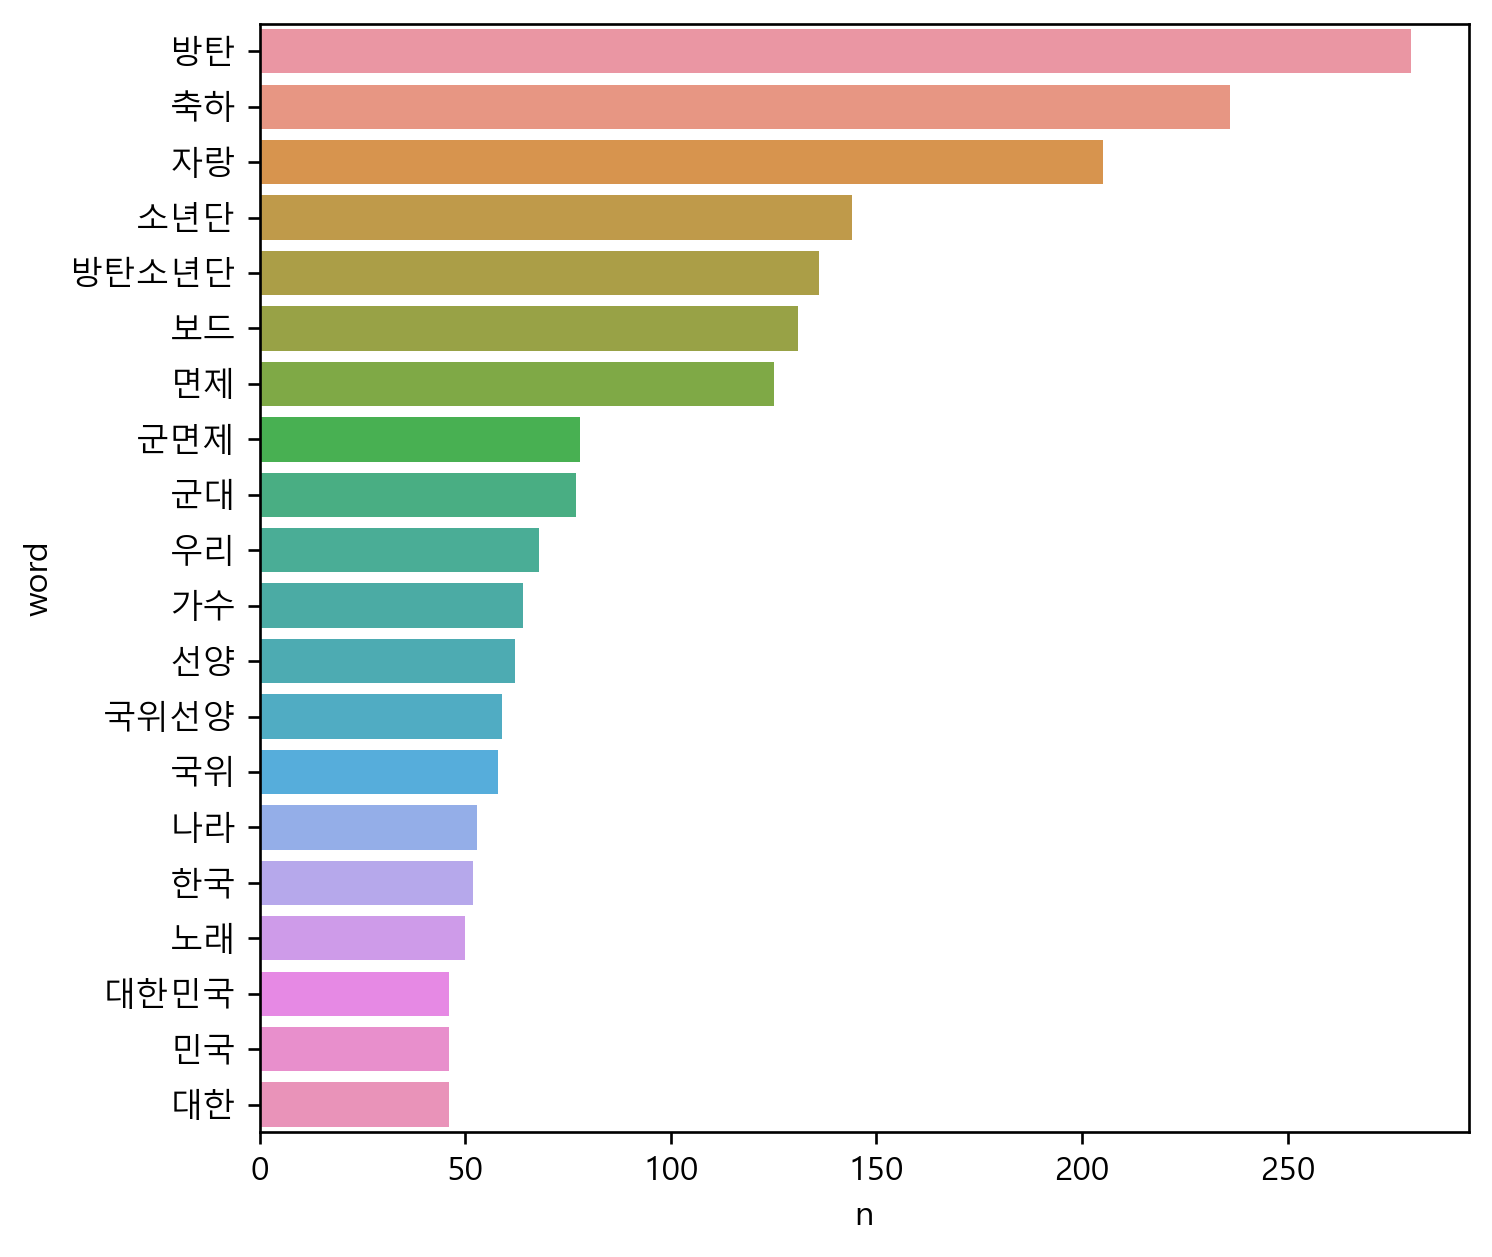

In [111]:
## 막대 그래프 만들기: 상위 20개 빈도 단어
# 가로 세로 크기 설정
plt.rcParams.update({'figure.figsize': [6.5, 6]})

# 막대 그래프 만들기
sns.barplot(data = top20, y = 'word', x = 'n')

#### **워드 클라우드 만들기**

In [112]:
## 데이터 프레임을 딕셔너리로 변환
dic_word = df_cnt.set_index('word').to_dict()['n']

In [113]:
## masking에 사용할 이미지 지정
import PIL  #Python Imaging Library
icon = PIL.Image.open('cloud.png')

## 이미지로 Mask 만들기
import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

In [114]:
## WordCloud 객체 wc 만들기
wc = WordCloud(random_state = 123,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)                  # mask 설정

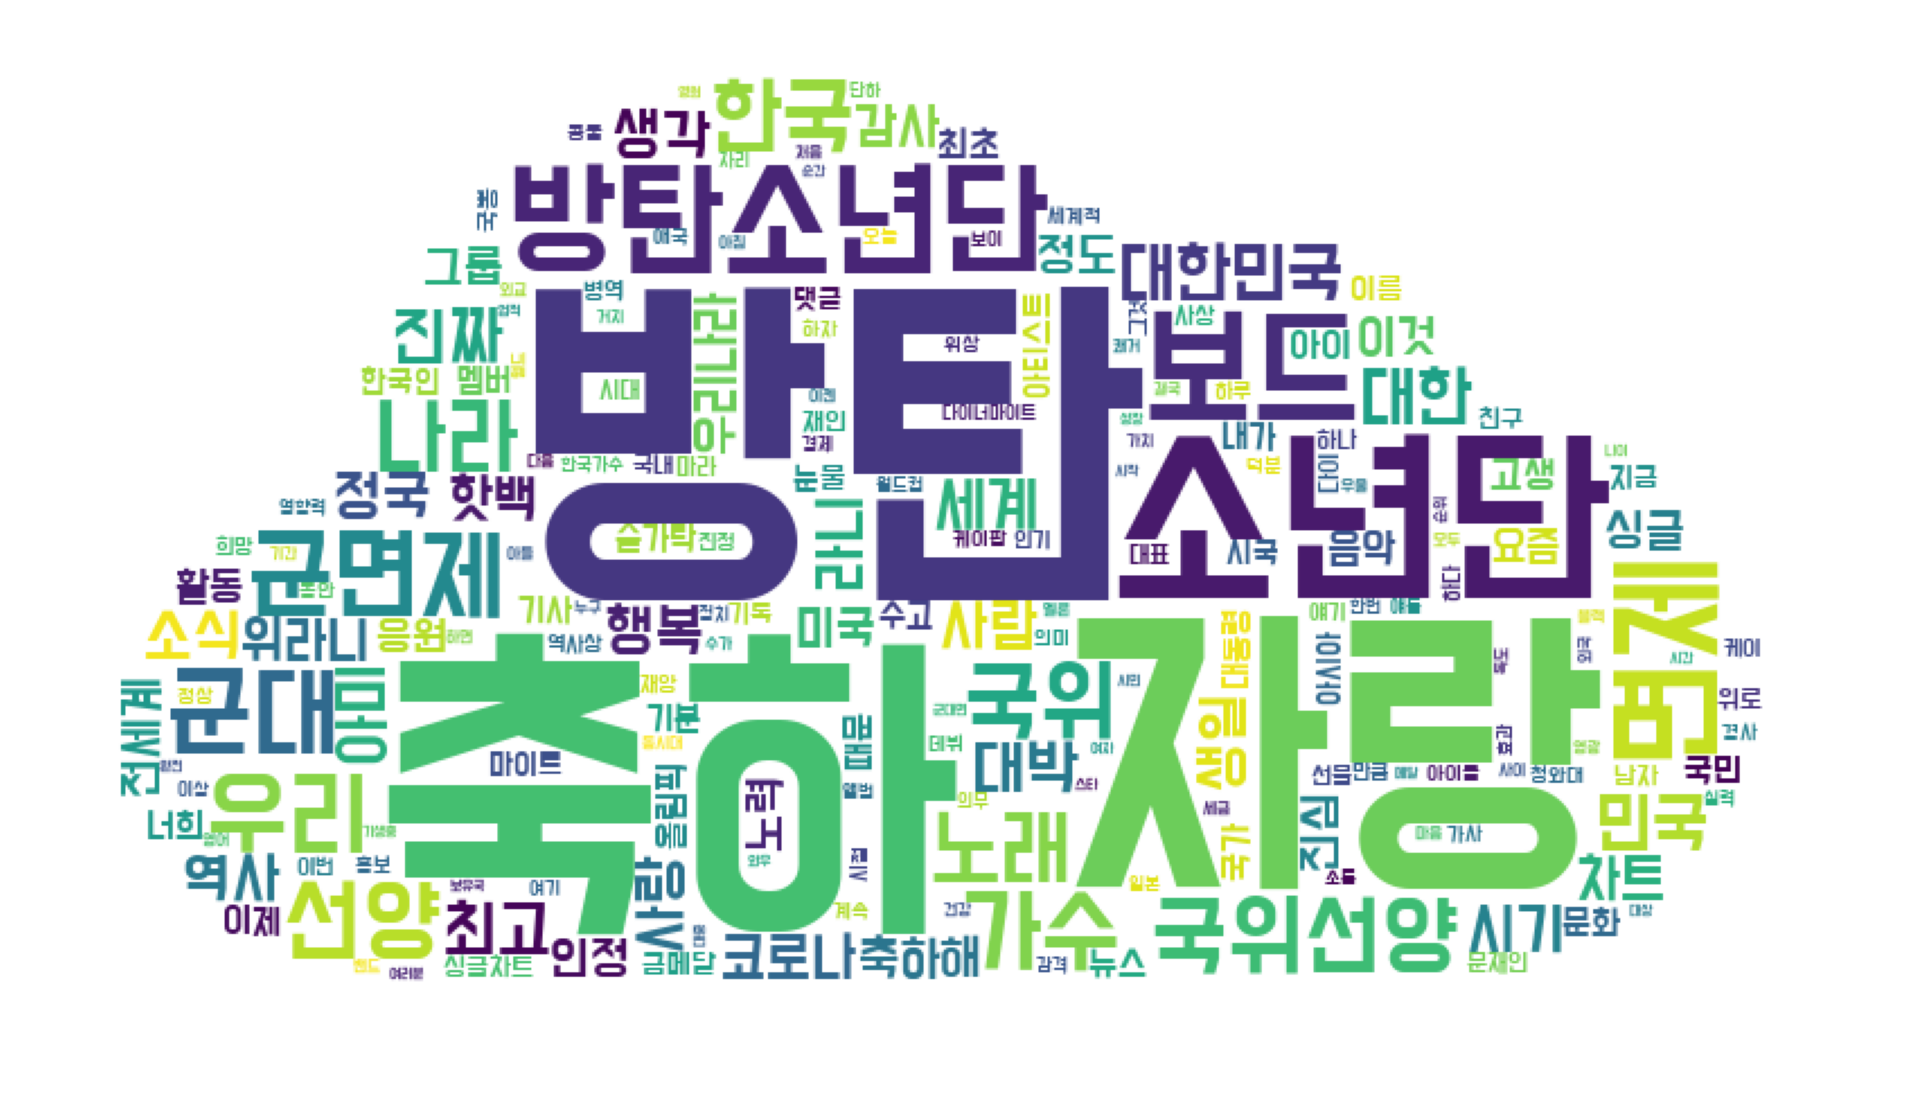

In [115]:
## 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud)       # 워드 클라우드 출력

### **[과제] 스티브 잡스의 스텐퍼드대학교 졸업식 축사 WordCloud 만들기**
##### **1. 연설문 텍스트 데이터 구성**
###### > 'speech_jobs_KOR.txt' 파일을 읽어들여서 데이터 프레임 구성 후 출력 확인
###### > 불필요한 문자 제거하기 : 한글을 제외한 문자를 제거
###### > 명사만 추출하여 리스트로 구성
##### **2. 단어 길이 데이터 프레임 만들기**
###### > 각 단어별 길이를 데이터 프레임으로 변환 (단어의 길이 컬럼 추가)
###### > 길이가 2 이상인 문자만으로 재구성 : 길이 순서 정렬
##### **3. 단어 빈도수 데이터 프레임 만들기**
###### > 단어 빈도수 순으로 프레임 구성
###### > 빈도수 상위 20 단어 추출
###### > 빈도수 상위 20 막대 그래프 그리기
##### **4. 워드 클라우드 만들기**
###### > [준비] 데이터 프레임을 딕셔너리로 변환
###### > 변환된 딕셔너리 10개 item만 출력 확인
###### > [준비] 사용할 폰트 지정
###### > WordCloud 이미지 출력
##### **5. 직접 만든 이미지로 워드 클라우드 만들기**
###### > PIL : Python Imaging Library 패키지 사용 이미지 읽어오기
###### > 컬러를 원하는 맵 색상으로 설정 
###### > WordCloud 이미지 출력